<a href="https://colab.research.google.com/github/DuarteVn/EDA_Desafio_Horus/blob/main/Desafio_Analise_Preditiva_Transacoes_Vinicius_Duarte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Descritiva e Preditiva de Transações

In [1]:
#@markdown # Importações, upload do arquivo e leitura do Excel
#@markdown ---
#@markdown Nesta etapa, importa-se as bibliotecas e faz upload do arquivo.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

arquivo = list(uploaded.keys())[0]
df = pd.read_excel(arquivo, sheet_name='Planilha1')

print(df.shape)
df.head()


Saving dados_desafio.xlsx to dados_desafio.xlsx
(112492, 32)


,id_pedido,tipo_pagamento,prestacoes,valor_pagamento,id_cliente,status_pedido,data_hora_pedido,pedido_aprovado,pedido_com_entregador,pedido_entregue,...,comprimento_produto,altura_produto,largura_produto,cep_vendedor,cidade_vendedor,estado_vendedor,id_unica_cliente,cep_cliente,cidade_cliente,estado_cliente
0,05d5a67b06f86425711075939a164657,credit_card,1,18.38,716c95338343be76a421f05145f6d9b7,delivered,2017-10-24 09:17:09.000,2017-10-24 09:28:15.000,2017-10-25 22:45:59.000,2017-10-26 14:13:59.000,...,16.0,7.0,12.0,4870,sao paulo,SP,b4acaca510f847f9927914b51f9b0874,9861,sao bernardo do campo,SP
1,b1f9820e61b6a6a7643c961eaf4f217d,credit_card,1,28.23,6e550daa4d9d07414a598ee4682289a0,delivered,2018-04-09 18:06:35.971,2018-04-09 18:31:35.962,2018-04-10 19:24:56.995,2018-04-16 18:05:41.971,...,20.0,15.0,15.0,6716,cotia,SP,9abf4d8d20ca191ce59eb6227cf53d6d,38270,campina verde,MG
2,b27f6a3ed9bfe29879c912b10bcf081b,credit_card,9,92.57,dd774d127953e12f6953a9d36e6a3cc4,delivered,2018-01-02 20:32:35.981,2018-01-02 20:50:16.022,2018-01-08 12:32:48.019,2018-01-16 20:52:39.014,...,60.0,20.0,30.0,13232,campo limpo paulista,SP,dc446a1ea0c8cc3eb1cd31896f6cf00f,12919,braganca paulista,SP
3,a182c021b0561e70031de925b3991fb3,credit_card,4,176.99,1d93c38087f43927ad29cdbd73a1a01b,delivered,2018-04-02 20:25:56.035,2018-04-02 20:35:17.030,2018-04-04 18:13:12.029,2018-04-11 11:14:30.970,...,17.0,11.0,16.0,14840,guariba,SP,14691264ea396cd3bd71ebbe36bc6771,29278,arace,ES
4,8e76f4ac6aee1d6013e40279de68a7cf,credit_card,10,110.56,e085989aa21e36b90469d6940aefe23c,delivered,2017-08-05 17:52:44.026,2017-08-05 18:10:09.034,2017-08-07 17:39:02.966,2017-08-15 19:59:47.962,...,50.0,7.0,33.0,14940,ibitinga,SP,06c211500493e0aa2c584346c15a1d81,95770,feliz,RS


In [2]:
#@markdown # 2. Exploração inicial e conversão dos dados.
#@markdown ---
#@markdown Nesta célula, é possível verificar o número total de registros, colunas,
#@markdown os tipos de dados presentes e também a existência de valores nulos/ausentes.

#@markdown Pode-se visualizar também algumas colunas-chave como `data_avaliacao`, `data_resposta_avaliacao`, `pedido_entregue`, `categoria_produto`
#@markdown e `pedido_com_entregador` apresentam maior quanditade de valores ausentes.
#@markdown Esses nulos de eventos não realizados (ex: cliente não avaliou, pedido não entregue),
#@markdown pode ser situações reais do negócio e não um erro de coleta.

#@markdown Foi realizada também a conversão das colunas com informações temporais para o formato datetime (boas práticas),
#@markdown o que nos permitiu calcular durações, filtrar por períodos e extrair informações temporais.

#@markdown `errors='coerce'` evita erro em valores inválidos.

col_datas = [
    'data_hora_pedido','pedido_aprovado','pedido_com_entregador',
    'pedido_entregue','data_avaliacao','data_resposta_avaliacao'
]

for c in col_datas:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

diag = pd.DataFrame({
    'Tipo de Dado': df.dtypes.astype(str),
    'Valores Nulos': df.isnull().sum(),
    '%Nulos': (df.isnull().sum()/len(df)*100).round(2)
}).sort_values('Valores Nulos', ascending=False)

diag.head(31)

,Tipo de Dado,Valores Nulos,%Nulos
data_avaliacao,datetime64[ns],4632,4.12
data_resposta_avaliacao,datetime64[ns],4632,4.12
pedido_entregue,datetime64[ns],2363,2.10
categoria_produto,object,1620,1.44
pedido_com_entregador,datetime64[ns],1180,1.05
comprimento_produto,float64,18,0.02
altura_produto,float64,18,0.02
peso_produto,float64,18,0.02
largura_produto,float64,18,0.02
pedido_aprovado,datetime64[ns],15,0.01


In [3]:
#@markdown # 3. Engenharia de atributos: tempos e componentes de data
#@markdown ---
#@markdown Criar métricas temporais úteis e extrair componentes de data para ajudar o modelo.
#@markdown -
#@markdown - `tempo_aprovacao_h`: Representa o tempo em horas entre aprovação e realização do pedido. Valores abaixo de 1 hora pode indicar que a aprovação do pedido é bastante rápida/automatizada.
#@markdown - `tempo_envio_h`: Tempo em horas desde a aprovação até o envio do pedido. Valores variam bastante chegando até 135 horas (~5 dias).
#@markdown - `tempo_entrega_d`: Tempo total da entrega em dias. Provavelmente o tempo da aprovação até o recebimento .
#@markdown

# tempos (em horas/dias)
df['tempo_aprovacao_h'] = (df['pedido_aprovado'] - df['data_hora_pedido']).dt.total_seconds()/3600
df['tempo_envio_h']     = (df['pedido_com_entregador'] - df['pedido_aprovado']).dt.total_seconds()/3600
df['tempo_entrega_d']   = (df['pedido_entregue'] - df['data_hora_pedido']).dt.days

# componentes temporais do pedido
df['pedido_ano']   = df['data_hora_pedido'].dt.year
df['pedido_mes']   = df['data_hora_pedido'].dt.month
df['pedido_dow']   = df['data_hora_pedido'].dt.dayofweek  # 0=segunda
df['pedido_hora']  = df['data_hora_pedido'].dt.hour

df[['tempo_aprovacao_h','tempo_envio_h','tempo_entrega_d','pedido_ano','pedido_mes','pedido_dow','pedido_hora']].head()




,tempo_aprovacao_h,tempo_envio_h,tempo_entrega_d,pedido_ano,pedido_mes,pedido_dow,pedido_hora
0,0.185000,37.295556,2.0,2017,10,1,9
1,0.416664,24.889176,6.0,2018,4,0,18
2,0.294456,135.708888,14.0,2018,1,1,20
3,0.155832,45.631944,8.0,2018,4,0,20
4,0.290280,47.481648,10.0,2017,8,5,17


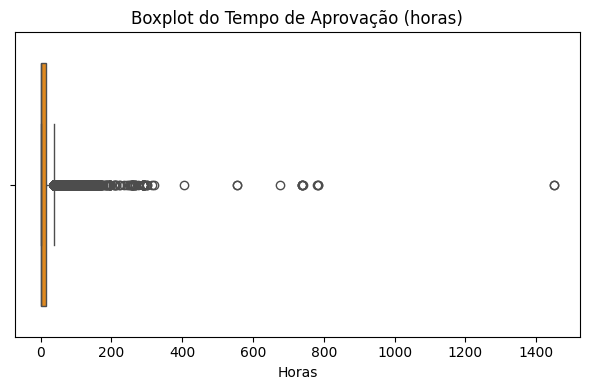

/tmp/ipython-input-1593773998.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pedido_dow'], palette='mako')


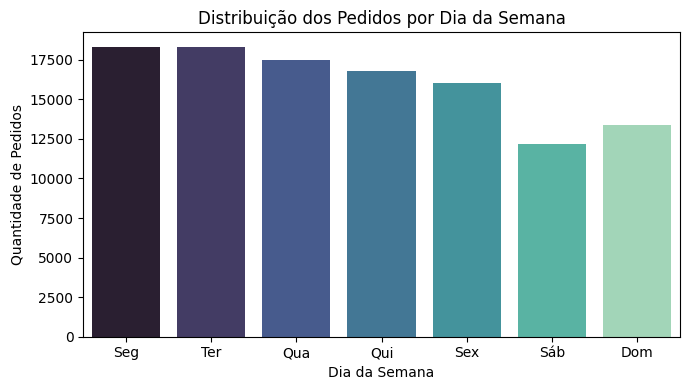

In [4]:
#@markdown #3.1 Boxplot do tempo de aprovação e pedidos por dia da semana
#@markdown - A presença de outliers pode indicar aprovações automáticas ou atrasadas.


plt.figure(figsize=(6, 4))
sns.boxplot(x=df['tempo_aprovacao_h'], color='darkorange')
plt.title('Boxplot do Tempo de Aprovação (horas)')
plt.xlabel('Horas')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
sns.countplot(x=df['pedido_dow'], palette='mako')
plt.xticks(ticks=range(7), labels=dias)
plt.title('Distribuição dos Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Pedidos')
plt.tight_layout()
plt.show()


In [5]:
#@markdown # 4. Seleção de features, target e prevenção de vazamento
#@markdown ---
#@markdown O target vai ser o **valor_pagamento**. Pois apresenta uma relação pausível entre as variáveis independentes:
#@markdown - Quantidade de produtos (`quantidade`.
#@markdown - Preço unitário (`preco`).
#@markdown - Tipo de pagamento
#@markdown - Tempo de entrega
#@markdown - Mês e ano da compra (sazonalidade)
#@markdown
#@markdown


target = 'valor_pagamento'

# numéricas possivelmente úteis sem vazamento direto
num_features = [
    'prestacoes',
    'peso_produto','comprimento_produto','altura_produto','largura_produto',
    'tempo_aprovacao_h','tempo_envio_h',
    'pedido_ano','pedido_mes','pedido_dow','pedido_hora'
]

# categóricas
cat_features = [
    'tipo_pagamento','categoria_produto',
    'estado_cliente','cidade_cliente',
    'estado_vendedor','cidade_vendedor'
]

# remover colunas inexistentes (segurança)
num_features = [c for c in num_features if c in df.columns]
cat_features = [c for c in cat_features if c in df.columns]

print("Numéricas:", num_features)
print("Categóricas:", cat_features)

# drop linhas sem target
df_model = df.dropna(subset=[target]).copy()
df_model[target] = pd.to_numeric(df_model[target], errors='coerce')
df_model = df_model.dropna(subset=[target]).copy()

print(df_model.shape)


Numéricas: ['prestacoes', 'peso_produto', 'comprimento_produto', 'altura_produto', 'largura_produto', 'tempo_aprovacao_h', 'tempo_envio_h', 'pedido_ano', 'pedido_mes', 'pedido_dow', 'pedido_hora']
Categóricas: ['tipo_pagamento', 'categoria_produto', 'estado_cliente', 'cidade_cliente', 'estado_vendedor', 'cidade_vendedor']
(112492, 39)


In [6]:
#@markdown # 5. Divisão do Conjunto de Dados (treino/teste)
#@markdown ---
#@markdown Utilizar a data do pedido para simular cenário real

#@markdown - 80% dos dados, que serão usados para ajustar (treinar) o modelo de regressão.
#@markdown - 20% restantes, utilizados para avaliar o desempenho do modelo com dados que ele nunca viu.
#@markdown
#@markdown A divisão foi balanceada e preserva a estrutura do dataset original.

assert 'data_hora_pedido' in df_model.columns, "Falta data_hora_pedido"
df_model = df_model.sort_values('data_hora_pedido')

X = df_model[num_features + cat_features].copy()
y = df_model[target].values

cut = int(0.8*len(df_model))
X_train, X_test = X.iloc[:cut], X.iloc[cut:]
y_train, y_test = y[:cut], y[cut:]

print("Treino:", X_train.shape, "| Teste:", X_test.shape)

Treino: (89993, 17) | Teste: (22499, 17)


In [7]:
#@markdown # 6. Construção dos Modelos Preditivos
#@markdown ---
#@markdown ## Construir e comparar modelos de regressão para prever o valor do pagamento (`valor_pagamento`) com base em variáveis do dataset.
#@markdown - Mantemos apenas categóricas curtas: `tipo_pagamento`, `categoria_produto`, `estado_cliente`, `estado_vendedor`.
#@markdown - Excluídas: Cidades, IDs, nomes e categorias com muitos valores únicos

#@markdown ###3 Algoritmos foram utilizados:
#@markdown
#@markdown
#@markdown - **Random Forest** – ensemble de árvores de decisão;
#@markdown - **Ridge Regression** – um modelo linear com regularização L2;
#@markdown - **LightGBM** – modelo gradient boosting eficiente para grandes volumes de dados.

#@markdown ### Os dados passaram por um `Pipeline` de transformação, com:
#@markdown - `StandardScaler` para variáveis numéricas;
#@markdown - `OneHotEncoder` esparso para variáveis categóricas com agrupamento de categorias raras (`min_frequency=0.5%`);
#@markdown - `SimpleImputer` para lidar com valores ausentes.
#@markdown ---
#@markdown ### Os resultados foram:
#@markdown - O **LightGBM** foi o melhor modelo, com menor erro absoluto médio (MAE) e melhor coeficiente de determinação (R² ≈ 28.2%).
#@markdown - O **Random Forest** também obteve bons resultados e pode ser uma opção robusta.
#@markdown - O **Ridge** teve desempenho inferior, mas ainda útil como baseline.
#@markdown



!pip -q install lightgbm

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb

# gemini help here
usar_log_target = False

# OneHot esparso e agrupa raras se disponível
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True, min_frequency=0.005)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=True)

num_pipe = Pipeline([('imp', SimpleImputer(strategy='median')),
                     ('sc', StandardScaler())])
cat_pipe = Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                     ('ohe', ohe)])

prep = ColumnTransformer([
    ('num', num_pipe, [c for c in num_features if c in X_train.columns]),
    ('cat', cat_pipe, [c for c in cat_features if c in X_train.columns])
])

modelos = {
    'Ridge'        : Ridge(alpha=1.0, random_state=42),
    'RandomForest' : RandomForestRegressor(
        n_estimators=160, max_depth=18, max_features='sqrt',
        min_samples_leaf=2, max_samples=0.85, n_jobs=-1, random_state=42
    ),
    'LightGBM'     : lgb.LGBMRegressor(
        n_estimators=700, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42, n_jobs=-1
    )
}

resultados, pipes = [], {}
for nome, modelo in modelos.items():
    pipe = Pipeline([('prep', prep), ('model', modelo)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)

    if usar_log_target:
        pred_eval = np.expm1(pred)
        y_eval   = np.expm1(y_test)
    else:
        pred_eval = pred
        y_eval   = y_test
    mae  = mean_absolute_error(y_eval, pred_eval)
    rmse = mean_squared_error(y_eval, pred_eval)**0.5
    r2   = r2_score(y_eval, pred_eval)
    resultados.append((nome, mae, rmse, r2))
    pipes[nome] = pipe

df_res = pd.DataFrame(resultados, columns=['Modelo','MAE','RMSE','R2']).sort_values('RMSE')
df_res

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1354
[LightGBM] [Info] Number of data points in the train set: 89993, number of used features: 128
[LightGBM] [Info] Start training from score 171.296248


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,Modelo,MAE,RMSE,R2
2,LightGBM,90.278480,226.135975,0.281961
1,RandomForest,94.453881,232.851723,0.238679
0,Ridge,106.422393,237.244902,0.209680


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Melhor: LightGBM
MAE : 90.28
RMSE: 226.14
R²  : 0.282


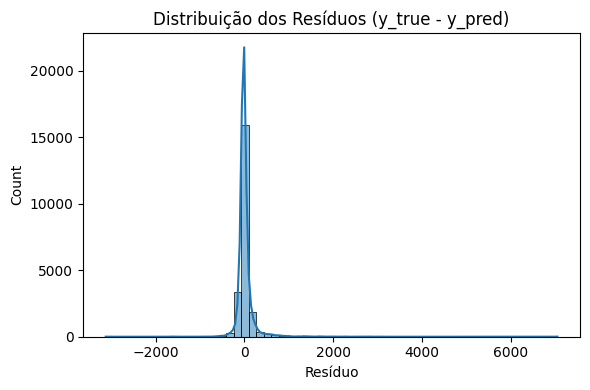

In [8]:
#@markdown #7. Diagnóstico do Melhor Modelo
#@markdown ---
#@markdown ## Métricas finais
#@markdown Melhor modelo: LightGBM:
#@markdown - MAE: R$ 90,28
#@markdown - RMSE: RS 226,14
#@markdown -  R2: 0.282

#@markdown ---
#@markdown ## Distribuição dos resíduos:
#@markdown - A distribuição tem uma leve assimetria à direita, típica de valores monetários com cauda longa.
#@markdown - Existem alguns outliers com erros elevados (acima de R$ 1000), mas são minoria.
#@markdown
#@markdown
#@markdown
#@markdown
#@markdown
#@markdown
#@markdown
#@markdown
#@markdown
#@markdown
#@markdown



best = df_res.iloc[0]['Modelo']
best_pipe = pipes[best]
pred_best = best_pipe.predict(X_test)

if usar_log_target:
    y_eval = np.expm1(y_test)
    pred_eval = np.expm1(pred_best)
else:
    y_eval = y_test
    pred_eval = pred_best

mae  = mean_absolute_error(y_eval, pred_eval)
rmse = mean_squared_error(y_eval, pred_eval)**0.5
r2   = r2_score(y_eval, pred_eval)

print(f"Melhor: {best}")
print(f"MAE : {mae:,.2f}\nRMSE: {rmse:,.2f}\nR²  : {r2:.3f}")

plt.figure(figsize=(6,4))
sns.histplot(y_eval - pred_eval, bins=60, kde=True)
plt.title('Distribuição dos Resíduos (y_true - y_pred)')
plt.xlabel('Resíduo'); plt.tight_layout(); plt.show()



/tmp/ipython-input-2195469583.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df, y='feature', x='importance', palette='viridis')


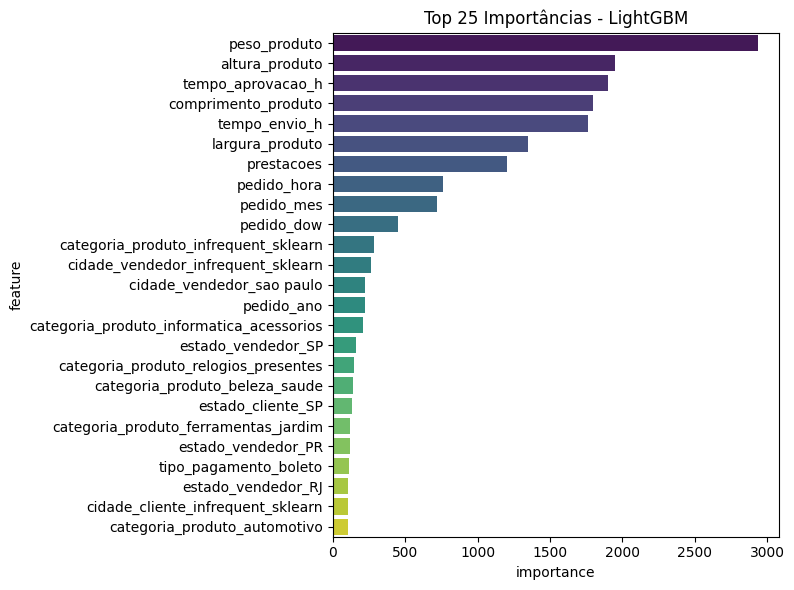

In [9]:
#@markdown # 8. Avaliação das Importâncias das Features
#@markdown ---
#@markdown  Nesta etapa foram analisadas 25 variáveis com maior impacto na performance do modelo preditivo escolhido(LightGBM).
#@markdown
#@markdown ### Principais resultados:
#@markdown Variáveis numéricas dominaram o topo do ranking com destaque absoluto para:
#@markdown - `peso_produto`: a variável mais relevante, indicando forte correlação entre peso e valor pago.
#@markdown - `altura_produto` `comprimento_produto``largura_produto`: reforçam a importância das dimensões físicas na hora da precificação
#@markdown - `tempo_aprovacao_h` e `tempo_envio_h`: sugerem que atrasos ou agilidade no processo logístico podem impactar o valor da compra.
#@markdown - Variáveis temporais como `pedido_hora`, `pedido_mes` e `pedido_dow` também contribuíram de forma moderada, indicando possíveis padrões de valor por período.
#@markdown ---
#@markdown
#@markdown
#@markdown
#@markdown



num_cols = [c for c in num_features if c in X_train.columns]
ohe_step = best_pipe.named_steps['prep'].named_transformers_['cat'].named_steps['ohe']
cat_cols = list(ohe_step.get_feature_names_out([c for c in cat_features if c in X_train.columns]))
feat_names = np.array(num_cols + cat_cols)

if best in ('RandomForest','LightGBM'):
    if best == 'RandomForest':
        importances = best_pipe.named_steps['model'].feature_importances_
    else:
        importances = best_pipe.named_steps['model'].feature_importances_
    top = np.argsort(importances)[::-1][:25]
    imp_df = pd.DataFrame({'feature': feat_names[top], 'importance': importances[top]})
    imp_df
else:
    coefs = best_pipe.named_steps['model'].coef_
    order = np.argsort(np.abs(coefs))[::-1][:25]
    pd.DataFrame({'feature': feat_names[order], 'coef': coefs[order]})

# Visualização das importâncias
plt.figure(figsize=(8,6))
sns.barplot(data=imp_df, y='feature', x='importance', palette='viridis')
plt.title(f'Top 25 Importâncias - {best}')
plt.tight_layout()
plt.show()


In [11]:
#@markdown # 9. Setup do tuning (imports & checagens)
#@markdown ---
#@markdown - Importação das bibliotecas necessárias para realizar o tuning (RandomizedSearchCV, Pipeline, lightgbm, scipy.stats).
#@markdown - Verificação de que as variáveis `X_train, y_train, prep`, etc. estão disponíveis.
#@markdown Garante que o pipeline seja testado de forma justa durante a validação cruzada
#@markdown - Separa os passos de preparação e modelagem
#@markdown - Permite testar múltiplas combinações de hiperparametros
#@markdown
#@markdown
#@markdown
#@markdown
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform
import lightgbm as lgb


# Checagens básicas
assert 'prep' in globals(), "Faltou criar o preprocessor"
assert 'X_train' in globals() and 'y_train' in globals() and 'X_test' in globals() and 'y_test' in globals(), "Split treino/teste não encontrado."
usar_log_target = globals().get('usar_log_target', False)

# Pipeline base (LightGBM)
pipe_lgb_base = Pipeline([
    ('prep', prep),
    ('model', lgb.LGBMRegressor(
        n_estimators=700,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])


In [14]:
#@markdown ##  9.1 — Espaço de busca e RandomizedSearchCV (cv=3)
#@markdown ---
#@markdown Buscar as melhores combinações de hiperparametros com eficiência, evitando testar todas as combinações possíveis
#@markdown
#@markdown Utilizar validação cruzada para medir a "robustez" do modelo, reduzindo o risco de overfitting.
#@markdown
#@markdown
param_dist = {
    'model__num_leaves'       : randint(31, 255),
    'model__max_depth'        : randint(4, 18),
    'model__min_child_samples': randint(5, 100),
    'model__subsample'        : uniform(0.6, 0.4),        # 0.6 ~ 1.0
    'model__colsample_bytree' : uniform(0.6, 0.4),        # 0.6 ~ 1.0
    'model__reg_alpha'        : loguniform(1e-3, 10),     # L1
    'model__reg_lambda'       : loguniform(1e-3, 10),     # L2
    'model__learning_rate'    : loguniform(0.01, 0.2),    # ~ 0.01 a 0.2
    'model__n_estimators'     : randint(400, 1200)
}

rs = RandomizedSearchCV(
    estimator=pipe_lgb_base,
    param_distributions=param_dist,
    n_iter=40,                     # ajuste aqui (20/40/80)
    scoring='neg_root_mean_squared_error',  # RMSE (negativo para maximizar)
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    refit=True   # re-treina no treino completo com os melhores params
)


rs.fit(X_train, y_train)

best_rmse_cv = -rs.best_score_
best_params  = rs.best_params_
best_params, best_rmse_cv


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1354
[LightGBM] [Info] Number of data points in the train set: 89993, number of used features: 128
[LightGBM] [Info] Start training from score 171.296248


({'model__colsample_bytree': np.float64(0.7434587125184655),
  'model__learning_rate': np.float64(0.021412852787253803),
  'model__max_depth': 13,
  'model__min_child_samples': 6,
  'model__n_estimators': 1184,
  'model__num_leaves': 134,
  'model__reg_alpha': np.float64(0.6138509947844857),
  'model__reg_lambda': np.float64(0.6455595882939567),
  'model__subsample': np.float64(0.743796460487902)},
 np.float64(223.42037938959606))

In [20]:
#@markdown ### 9.2 — Avaliação do melhor modelo no TESTE
#@markdown ---
#@markdown Encontrar o melhor modelo no tuning, avaliado diretamente no conjuinto de teste, nunca visto durante o treino ou validação, isso é importante pois confirma se o modelo tunado generaliza bem para os dados reais e permite comparar com o modelos anteriores e quantificar a melhoria obtida no tuning.
#@markdown
#@markdown
#@markdown
#@markdown
#@markdown
#@markdown
#@markdown
#@markdown
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_pipe = rs.best_estimator_
pred_test = best_pipe.predict(X_test)

if usar_log_target:
    y_eval = np.expm1(y_test)
    pred_eval = np.expm1(pred_test)
else:
    y_eval = y_test
    pred_eval = pred_test

mae  = mean_absolute_error(y_eval, pred_eval)
rmse = mean_squared_error(y_eval, pred_eval)**0.5
r2   = r2_score(y_eval, pred_eval)

print(" Melhores hiperparâmetros (CV):")
for k,v in best_params.items():
    print(f"  {k}: {v}")
print("\n Desempenho no TESTE (após tuning):")
print(f"  MAE : {mae:,.2f}")
print(f"  RMSE: {rmse:,.2f}")
print(f"  R²  : {r2:.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


 Melhores hiperparâmetros (CV):
  model__colsample_bytree: 0.7434587125184655
  model__learning_rate: 0.021412852787253803
  model__max_depth: 13
  model__min_child_samples: 6
  model__n_estimators: 1184
  model__num_leaves: 134
  model__reg_alpha: 0.6138509947844857
  model__reg_lambda: 0.6455595882939567
  model__subsample: 0.743796460487902

 Desempenho no TESTE (após tuning):
  MAE : 86.03
  RMSE: 219.66
  R²  : 0.323


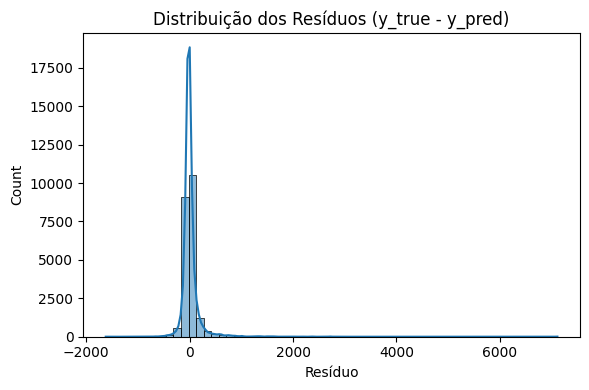

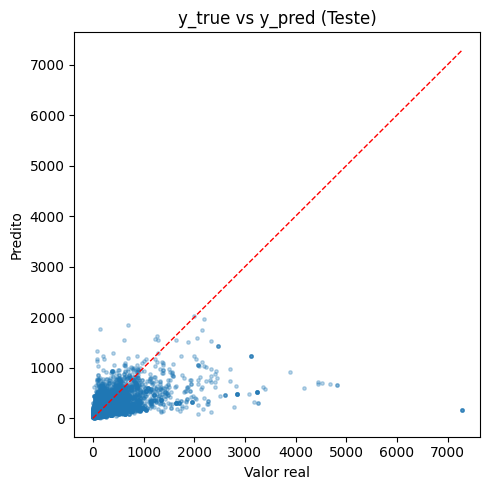

In [17]:
#@markdown #  10. Gráficos de diagnóstico
#@markdown ---
#@markdown - Plotagem de distribuição dos resíduos para identificar se os erros seguem uma distribuição simétrica e centrada
#@markdown - Plotagem de `y_true vs y_pred` mostra a aderencia das previsões à realidade

#@markdown Verificar padrões que métricas não mostram, como: Erros sistemáticos, outliers frequentes, predições desalinhadas

plt.figure(figsize=(6,4))
sns.histplot(y_eval - pred_eval, bins=60, kde=True)
plt.title('Distribuição dos Resíduos (y_true - y_pred)')
plt.xlabel('Resíduo')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(y_eval, pred_eval, s=6, alpha=0.3)
lims = [min(y_eval.min(), pred_eval.min()), max(y_eval.max(), pred_eval.max())]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.title('y_true vs y_pred (Teste)')
plt.xlabel('Valor real')
plt.ylabel('Predito')
plt.tight_layout()
plt.show()


In [18]:
#@markdown # 11. Importância de features (modelo tunado)
#@markdown ---
#@markdown Extraidas as 25 variáveis mais importantes segundo o modelo tunado.
#@markdown As features foram identificadas corretamente com os nomes após o OneHotEncoder
#@markdown
#@markdown - Foi importante o uso delas paara ver quais variáveis de fato impactam no modelo.
#@markdown - Auxiliar decisões estratégicas de negócio: se o `peso_produto` é importante, é porque produtos mais pesados costumam ter valores pagos mais altos
#@markdown
#@markdown

# Recupera nomes das colunas após o preprocessor
num_cols = [c for c in X_train.columns if c in getattr(prep, 'transformers_', []) or c in X_train.columns]  # fallback simples
try:
    # nomes numéricos (da lista original)
    num_cols = [c for c in X_train.columns if c in getattr(best_pipe.named_steps['prep'].transformers_[0][2], 'copy', lambda: [])()]  # pode não funcionar em todas versões
except:
    # forma robusta: use a lista que você já definiu no notebook
    num_cols = [c for c in globals().get('num_features', []) if c in X_train.columns]

# nomes categóricos
ohe_step = best_pipe.named_steps['prep'].named_transformers_['cat'].named_steps['ohe']
cat_cols = list(ohe_step.get_feature_names_out([c for c in globals().get('cat_features', []) if c in X_train.columns]))
feat_names = np.array(num_cols + cat_cols)

importances = best_pipe.named_steps['model'].feature_importances_
top = np.argsort(importances)[::-1][:25]
imp_df = pd.DataFrame({'feature': feat_names[top], 'importance': importances[top]})
imp_df


,feature,importance
0,peso_produto,18391
1,tempo_envio_h,15023
2,tempo_aprovacao_h,14790
3,altura_produto,13820
4,comprimento_produto,12784
5,largura_produto,11230
6,pedido_hora,7656
7,prestacoes,6975
8,pedido_mes,6782
9,pedido_dow,4965


/tmp/ipython-input-4238981011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df, y='feature', x='importance', palette='viridis')


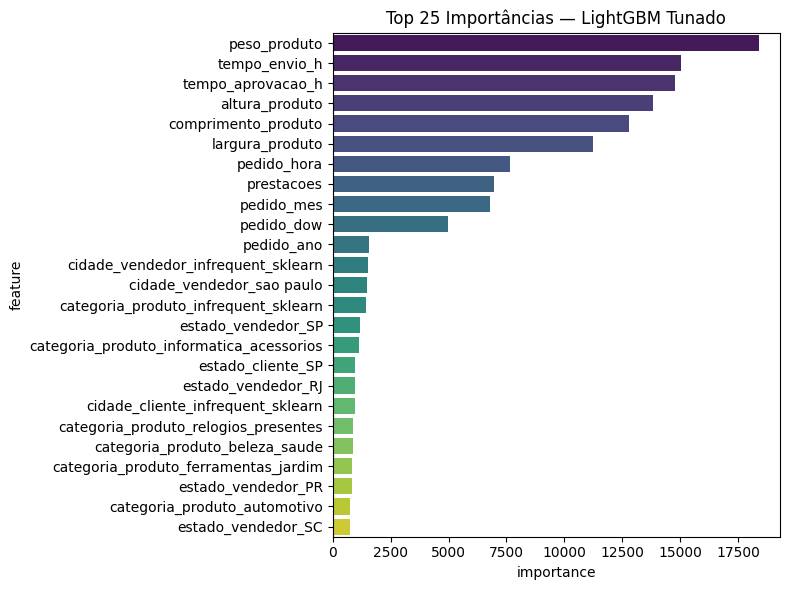

In [22]:
#@markdown # 11.1  Plot das top importâncias
#@markdown ---
#@markdown Plotagem do gráfico de barras com as 25 features mais relevantes ordenadas por importância
#@markdown
#@markdown - Visualizar e comparar com o modelo anterior antes do tuning.
#@markdown


plt.figure(figsize=(8,6))
sns.barplot(data=imp_df, y='feature', x='importance', palette='viridis')
plt.title('Top 25 Importâncias — LightGBM Tunado')
plt.tight_layout()
plt.show()


In [ ]:
#@markdown # 12. Conclusão Final
#@markdown ---
#@markdown
#@markdown - Foi possível desenvolver um modelo capaz de prever o **valor do pagamento** com base em características do pedido, do produto e da operação logística.
#@markdown
#@markdown - Características físicas do produto, especialmente `peso_produto`, `altura_produto`, `largura_produto` e `comprimento_produto`, se mostraram consistentemente entre as variáveis mais importantes. O `peso_produto` teve um aumento expressivo em importância após o tuning (de ~3.000 para ~17.500), indicando que o modelo passou a reconhecer mais fortemente sua influência no valor final da transação.
#@markdown
#@markdown - **Tempos logísticos** como `tempo_envio_h` e `tempo_aprovacao_h` também apresentaram alta relevância, confirmando que a **agilidade na operação** impacta o valor do pagamento — possivelmente refletindo no tipo de produto comprado ou no comportamento de clientes premium.
#@markdown
#@markdown - **Componentes temporais** como `pedido_hora`, `pedido_dow` e `pedido_mes` contribuíram com valor preditivo, revelando padrões sazonais no consumo.
#@markdown
#@markdown - Variáveis categóricas como `categoria_produto`, `estado_vendedor`, `cidade_cliente` e `tipo_pagamento` mostraram influência moderada, mas ainda assim relevante especialmente para capturar nuances de frete, centros de distribuição e perfis de comprador.
#@markdown
#@markdown
#@markdown
#@markdown ---
#@markdown
#@markdown - O modelo se mostrou coerente, estável e interpretável, reconhecendo padrões reais como:
#@markdown   - Produtos maiores e mais pesados tendem a gerar transações de maior valor;
#@markdown   - Processos logísticos eficientes se relacionam a pedidos de maior valor ou urgência;
#@markdown
#@markdown
#@markdown - O desafio demonstrou a importância de:
#@markdown   - Uso de modelos modernos e interpretáveis,
#@markdown   - E a aplicação de tuning avançado para obter ganhos reais em predição.
#@markdown

#@markdown